In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import ast
import re


file_path = "wildchat_analysis_results.csv"
data = pd.read_csv(file_path)


def remove_parentheses(text):
    return re.sub(r"\s*\(.*?\)\s*", "", text).strip()


def is_list(x):
    try:
        return isinstance(ast.literal_eval(x), list)
    except:
        return False

domain_is_list = data["Content Domain"].apply(is_list)
service_is_list = data["Types of Service"].apply(is_list)
eudomain_is_list = data["EU Domain"].apply(is_list)


def unpack_rows(row):
    domains = (
        ast.literal_eval(row["Content Domain"])
        if is_list(row["Content Domain"])
        else [row["Content Domain"]]
    )
    services = (
        ast.literal_eval(row["Types of Service"])
        if is_list(row["Types of Service"])
        else [row["Types of Service"]]
    )

    euservices = (
        ast.literal_eval(row["EU Domain"])
        if is_list(row["EU Domain"])
        else [row["EU Domain"]]
    )

    new_rows = []
    for domain in domains:
        for service in services:
            for euservice in euservices:
                new_row = row.copy()
                new_row["Content Domain"] = remove_parentheses(domain)
                new_row["Types of Service"] = remove_parentheses(service)
                new_row["EU Domain"] = remove_parentheses(euservice)
                new_rows.append(new_row)
    return pd.DataFrame(new_rows)


expanded_data = pd.DataFrame(columns=data.columns)
expanded_data = pd.concat(
    [unpack_rows(row) for _, row in data.iterrows()], ignore_index=True
)

data_expanded = pd.concat(
    [data[~domain_is_list & ~service_is_list], expanded_data], ignore_index=True
)


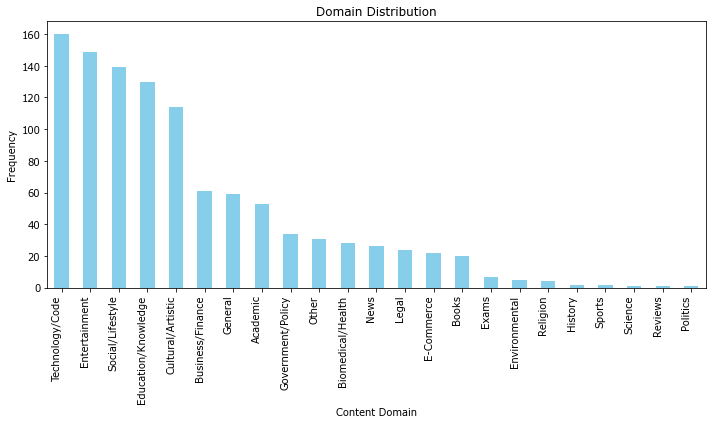

In [5]:
plt.figure(figsize=(10, 6))
domain_counts = data_expanded["Content Domain"].value_counts()
domain_counts.plot(kind="bar", color="skyblue")
plt.title("Domain Distribution")
plt.xlabel("Content Domain")
plt.ylabel("Frequency")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

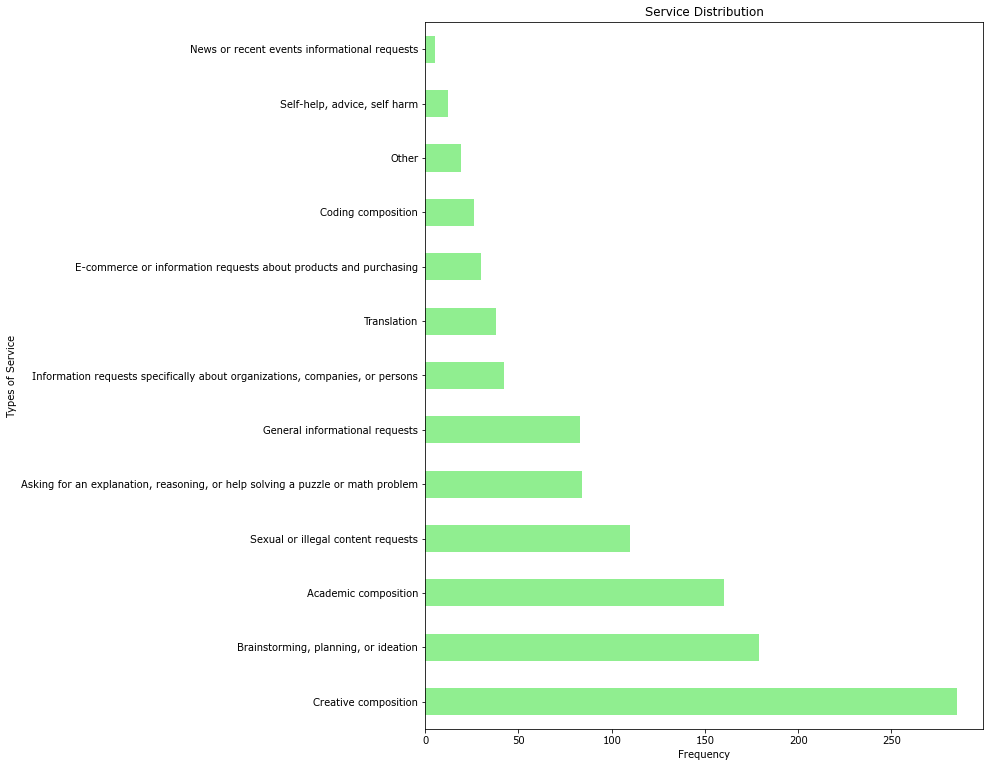

In [13]:
# Standardize "self help" categories
data_expanded["Types of Service"] = data_expanded["Types of Service"].apply(
    lambda x: "Self-help, advice, self harm" if re.match(r"(?i)self-help", x) else x
)

# Plot 2: Service Distribution
plt.figure(figsize=(10, 13))
service_counts = data_expanded["Types of Service"].value_counts()
service_counts.plot(
    kind="barh", color="lightgreen"
)  # Change 'bar' to 'barh' for horizontal bars
plt.title("Service Distribution")
plt.xlabel("Frequency")
plt.ylabel("Types of Service")
# plt.tight_layout()
plt.show()

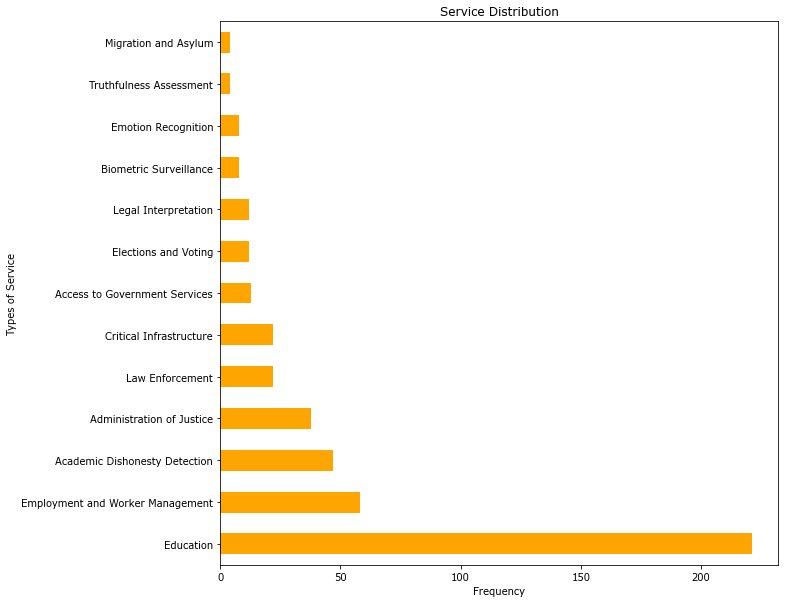

In [26]:
# Plot 2: Service Distribution


data_filtered = data_expanded[data_expanded["EU Domain"] != "Other"]


plt.figure(figsize=(10, 10))
service_counts = data_filtered["EU Domain"].value_counts()
service_counts.plot(
    kind="barh", color="orange"
)  # Change 'bar' to 'barh' for horizontal bars
plt.title("Service Distribution")
plt.xlabel("Frequency")
plt.ylabel("Types of Service")
# plt.tight_layout()
plt.show()

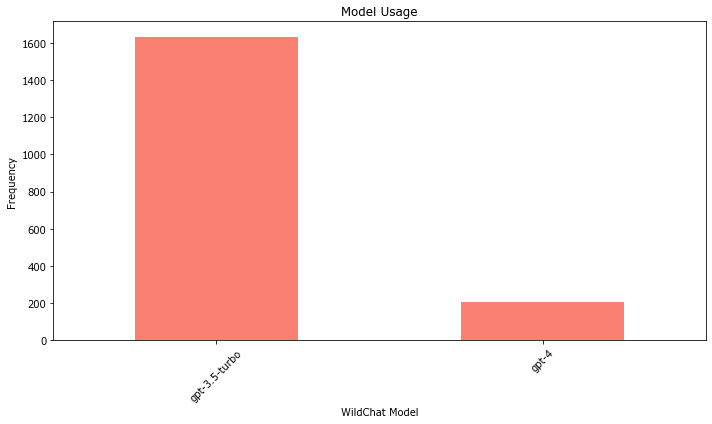

In [10]:
# Plot 3: Model Usage
plt.figure(figsize=(10, 6))
model_counts = data_expanded['WildChat Model'].value_counts()
model_counts.plot(kind='bar', color='salmon')
plt.title('Model Usage')
plt.xlabel('WildChat Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()